In [16]:
import pandas as pd
import numpy as np
import pca
import statsmodels.api as sma
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

In [17]:
Data=pd.read_excel("http://data.hossam.kr/E04/diamonds.xlsx")
data=pd.DataFrame(Data)

# STEP1. PreProcessing

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
data.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


### 범주형

#### 순서가 있는 경우

In [5]:
# 투명도
data.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [6]:
clarity='FL>IF>VVS1>VVS2>VS1>VS2>SI1>SI2>I1>I2>I3'.split(">")
clarity=dict(zip(clarity[::-1],range(1,len(clarity)+1)))

In [7]:
# cut
cut=dict(zip(["Fair", "Good", "Very Good", "Premium", "Ideal"],range(1,len(clarity)+1)))

#### 시각화

> 아래와 같이 만들면 원하는 순서가 보이질 않음..

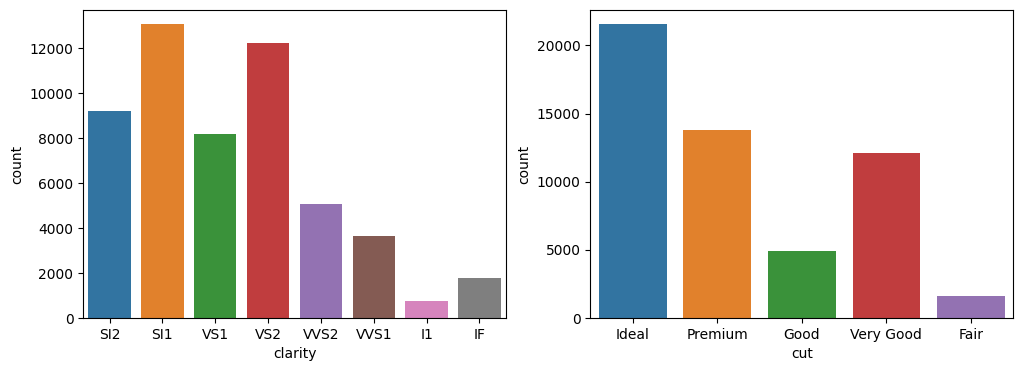

In [20]:
plt.rcParams["figure.figsize"]=(12,4)
f,a=plt.subplots(1,2)
f.title="순서가 있는 범주형"
a1=sb.countplot(data=data,x='clarity',ax=a[0])
a2=sb.countplot(data=data,x="cut",ax=a[1])
plt.show()

> 원하는 순서를 x축으로 바꾸기

In [9]:
visual_cut=data.cut.value_counts().to_frame().loc[cut.keys()]

In [10]:
visual_clarity=data.clarity.value_counts().to_frame()
rank=[]
for x in clarity.keys():
    if x in visual_clarity.index:
        rank.append(x)
visual_clarity=visual_clarity.loc[rank]

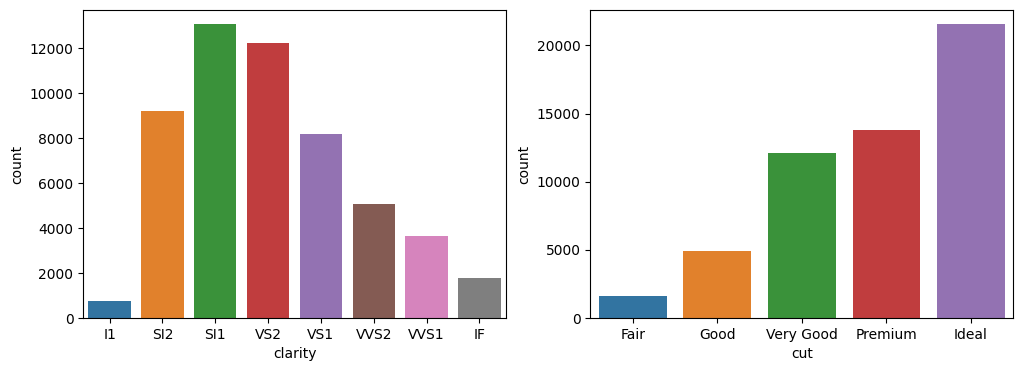

In [11]:
plt.rcParams["figure.figsize"]=(12,4)
f,a=plt.subplots(1,2)
f.title="순서가 있는 범주형"
a1=sb.barplot(data=visual_clarity,x=visual_clarity.index,y='count',ax=a[0])
a2=sb.barplot(data=visual_cut,x=visual_cut.index,y="count",ax=a[1])
plt.show()

### 정규성 검토

#### 순서가 없는 경우

In [14]:
data.color.value_counts().to_frame() #이런경우는 dummy 화 시키는게 맞지않나

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


## STEP2. 요인선정

#### 기초통계량

In [13]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000
